In [45]:
import sqlite3


In [61]:
conn = sqlite3.connect('movie_list.sqlite3')
c = conn.cursor()



In [47]:
#მოცემულ კოდის ფრაგმენტში შეგვყავს სასურველი წელიწადი და ფილმის რეიტინგი 
#(მინიმუმ 7, რადგან მხოლოდ მაღალრეიტინგიანი ფილმებია), შემდეგ კი ამოაგდებს ჩამონათვალს.
Released_Year = "1998"
IMDB_Rating = 8
c.execute("SELECT * FROM movie_list WHERE Released_Year=? AND IMDB_Rating<=?", (Released_Year, IMDB_Rating))
for each in c.fetchall():
    print(tuple(each))

('Festen', 1998, 'R', '105 min', 'Drama', 8, 82, 78341, '1,647,780')
('Central do Brasil', 1998, 'R', '110 min', 'Drama', 8, 80, 36419, '5,595,428')
('Happiness', 1998, None, '134 min', 'Comedy, Drama', 7.7, 81, 66408, '2,807,390')
('Rushmore', 1998, 'UA', '93 min', 'Comedy, Drama, Romance', 7.7, 86, 169229, '17,105,219')
('Le dÃ®ner de cons', 1998, 'PG-13', '80 min', 'Comedy', 7.7, 73, 37424, '4,065,116')
('Lola rennt', 1998, 'UA', '81 min', 'Crime, Drama, Thriller', 7.6, 77, 188317, '7,267,585')
('The Thin Red Line', 1998, 'A', '170 min', 'Drama, War', 7.6, 78, 172710, '36,400,491')
('Mulan', 1998, 'U', '88 min', 'Animation, Adventure, Family', 7.6, 71, 256906, '120,620,254')
('Fear and Loathing in Las Vegas', 1998, 'R', '118 min', 'Adventure, Comedy, Drama', 7.6, 41, 259753, '10,680,275')
('Dark City', 1998, 'A', '100 min', 'Mystery, Sci-Fi, Thriller', 7.6, 66, 187927, '14,378,331')


In [57]:
#მოცემულ ფრაგმენტში მომხმარებელი თავად ამატებს ფილმს და მოთხოვნილ პარამეტრებს
Series_Title = 'Thunderbolts*'
Released_Year = 2025
Certificate = 'PG-13'
Runtime = '126 min'
Genre = 'Sci-fi, superhero, action, crime, drama, fantasy, adventure'
IMDB_Rating = 7.5

c.execute("INSERT INTO movie_list (Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating) VALUES (?, ?, ?, ?, ?, ?)", (Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating))
conn.commit()

c.execute("SELECT * FROM movie_list ORDER BY rowid DESC LIMIT 1")
latest_entry = c.fetchone()
print("ბოლოს შეტანილი ფილმი:", latest_entry)

conn.close()


ბოლოს შეტანილი ფილმი: ('Thunderbolts*', 2025, 'PG-13', '126 min', 'Sci-fi, superhero, action, crime, drama, fantasy, adventure', 7.5, None, None, None)


In [60]:
#მოცემულ ფრაგმენტში მომხმარებელს შეუძლია არსებული მონაცემი განაახლოს, 
#ამ შემთხვევაში ფილმის რეიტინგი რადგან მუდმივად ცვალებადია
new_Rating = 7
Series_Title = 'Gladiator'

c.execute("UPDATE movie_list SET IMDB_Rating=? WHERE Series_Title=?", (new_Rating, Series_Title))
conn.commit()

c.execute("SELECT * FROM movie_list WHERE Series_Title=?", (Series_Title,))
updated_movie = c.fetchone()

if updated_movie:
    print("განახლებყლი ინფორმაცია:", updated_movie)
else:
    print(f"ასეთი სათაყრით ფილმი არ იძებნება '{Series_Title}'.")

conn.close()


განახლებყლი ინფორმაცია: ('Gladiator', 2000, 'UA', '155 min', 'Action, Adventure, Drama', 7, 67, 1341460, '187,705,427')


In [62]:
#მოცემული კოდი შლის გადაცემულ ფილმს მონაცემთა ბაზიდან
Series_Title = "Nuovo Cinema Paradiso"

c.execute("DELETE FROM movie_list WHERE Series_Title = ?", (Series_Title,))
conn.commit()

print(f"'{Series_Title}' წაიშალა მონაცემთა ბაზიდან")

conn.close()

'Nuovo Cinema Paradiso' წაიშალა მონაცემთა ბაზიდან


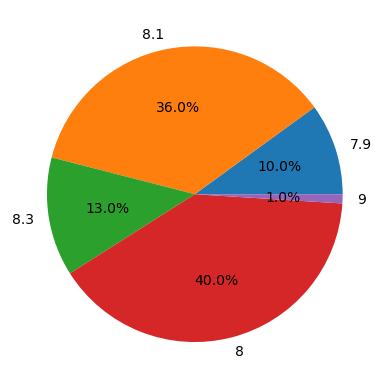

In [65]:
#მოცემული დიაგრამა აჩვენებს სიაში რომელი რეიტინგის ფილმი რა რაოდებობისაა

import matplotlib.pyplot as plt

labels = '7.9', '8.1', '8.3', '8', '9'
sizes = [10, 36, 13, 40, 1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

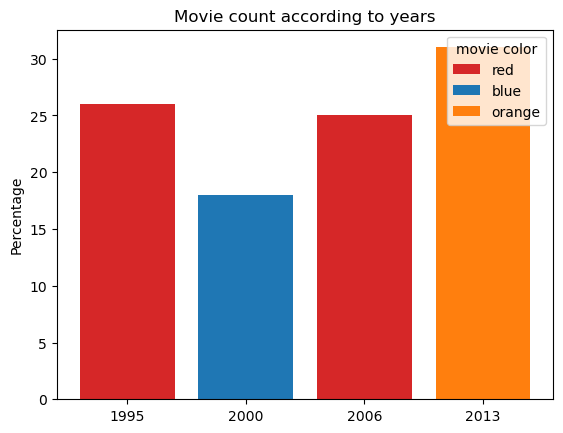

In [68]:
#მოცემული დიაგრამა აჩვენებს წლების მიხედვით რამდენი ფილმი გამოვიდა

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['1995', '2000', '2006', '2013']
counts = [26, 18, 25, 31]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Percentage')
ax.set_title('Movie count according to years')
ax.legend(title='movie color')

plt.show()

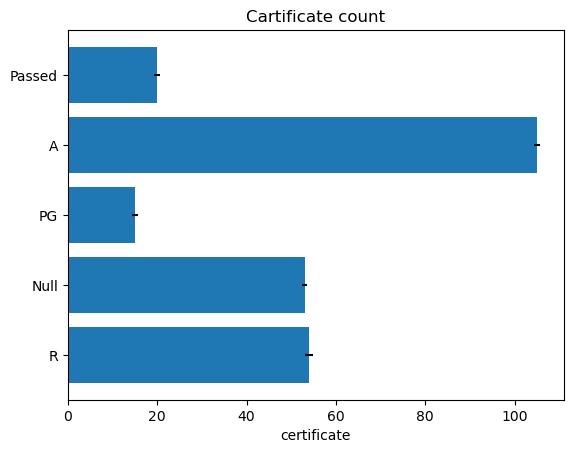

In [73]:
#ეს დიაგრამა გვიჩვენებს მოცემული სერტიფიკატით რა რაოდენობის ფილმები გამოვიდა

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
certificate = ('Passed', 'A', 'PG', 'Null', 'R')
y_pos = np.arange(len(certificate))
count = [20, 105, 15, 53, 54]
error = np.random.rand(len(certificate))

ax.barh(y_pos, count, xerr=error, align='center')
ax.set_yticks(y_pos, labels=certificate)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('certificate')
ax.set_title('Cartificate count')

plt.show()